<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#build-data" data-toc-modified-id="build-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>build data</a></span></li><li><span><a href="#train-and-mearuse-quality" data-toc-modified-id="train-and-mearuse-quality-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>train and mearuse quality</a></span></li><li><span><a href="#research-errors" data-toc-modified-id="research-errors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>research errors</a></span></li><li><span><a href="#try-add-first-feature" data-toc-modified-id="try-add-first-feature-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>try add first feature</a></span></li></ul></div>

In [22]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# build data

In [268]:
np.random.seed(2)
n = 1000

df = pd.DataFrame(np.random.randn(n, 2), columns=['x1', 'x2'])
x1_min, x2_min = df['x1'].min(), df['x2'].min()
df['x1'] *= 3
if x1_min < 0.:
    df['x1'] += 1 + x1_min
if x2_min < 0:
    df['x2'] += 1 + x2_min
df['hidden_feature'] = 2* df['x1'] * df['x2'] + ((df['x1'] ** 2) * 5)

threshold = df['hidden_feature'].median()
df['y'] = df['hidden_feature'] > threshold

In [269]:
df_train = df.sample(frac=0.9)
df_test = df[~df.index.isin(df_train.index)].copy()

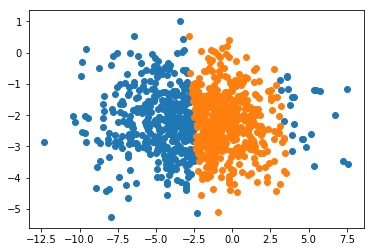

In [270]:
plt.scatter(df_train[df_train['y']]['x1'], df_train[df_train['y']]['x2'])
plt.scatter(df_train[~df_train['y']]['x1'], df_train[~df_train['y']]['x2'])
plt.show()

# train and mearuse quality

In [271]:
model = LogisticRegression()
model.fit(df_train[['x1', 'x2']], df_train['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [272]:
df_train_copy = df_train.copy()
df_train_copy['y_predict'] = model.predict_proba(df_train[['x1', 'x2']])[:, 1]

In [273]:
accuracy = accuracy_score(df_train_copy['y'], df_train_copy['y_predict'] > 0.5)
accuracy

0.94333333333333336

In [274]:
roc_auc = roc_auc_score(df_train_copy['y'], df_train_copy['y_predict'])
roc_auc

0.94640493827160488

In [275]:
df_test['y_predict'] = model.predict_proba(df_test[['x1', 'x2']])[:, 1]

accuracy = accuracy_score(df_test['y'], df_test['y_predict'] > 0.5)
accuracy

roc_auc = roc_auc_score(df_test['y'], df_test['y_predict'])
roc_auc

print('accuracy', accuracy, 'roc_auc', roc_auc)

accuracy 0.92 roc_auc 0.9188


# research errors

In [276]:
df_train_copy['error'] = df_train_copy['y'] - np.log((1. / df_train_copy['y_predict']) - 1.)

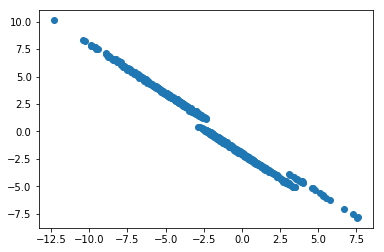

In [277]:
plt.scatter(df_train_copy['x1'], df_train_copy['error'])

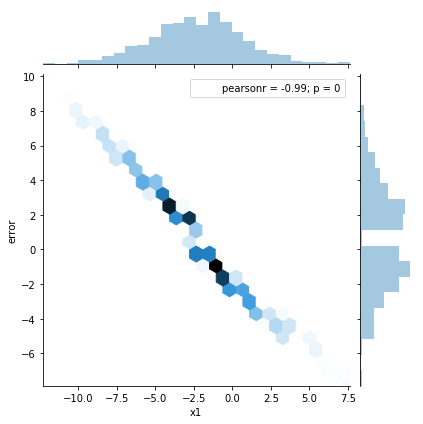

In [278]:
sns.jointplot(df_train_copy['x1'], df_train_copy['error'], kind='hex')

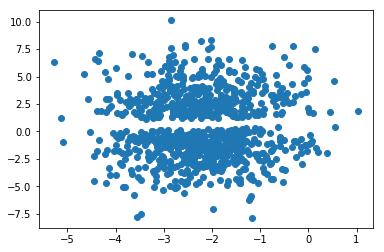

In [279]:
plt.scatter(df_train_copy['x2'], df_train_copy['error'])

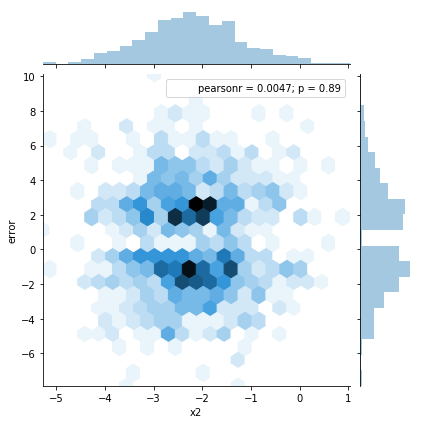

In [280]:
sns.jointplot(df_train_copy['x2'], df_train_copy['error'], kind='hex')

# try add first feature

In [281]:
df_train['x3'] = df_train['x1'] ** 2
df_test['x3'] = df_test['x1'] ** 2

In [282]:
model = LogisticRegression()
model.fit(df_train[['x1', 'x2', 'x3']], df_train['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [283]:
df_test['y_predict'] = model.predict_proba(df_test[['x1', 'x2', 'x3']])[:, 1]

accuracy = accuracy_score(df_test['y'], df_test['y_predict'] > 0.5)
accuracy

roc_auc = roc_auc_score(df_test['y'], df_test['y_predict'])
roc_auc

print('accuracy', accuracy, 'roc_auc', roc_auc)

accuracy 0.96 roc_auc 0.9972


In [287]:
df_train_copy = df_train.copy()
df_train_copy['y_predict'] = model.predict_proba(df_train[['x1', 'x2', 'x3']])[:, 1]

In [297]:
df_train_copy['error'] = df_train_copy['y'] + np.log((1. / df_train_copy['y_predict']) - 1.)

/Users/toly/projects/research_ml/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


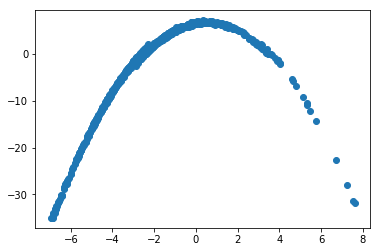

In [298]:
plt.scatter(df_train_copy['x1'], df_train_copy['error'])

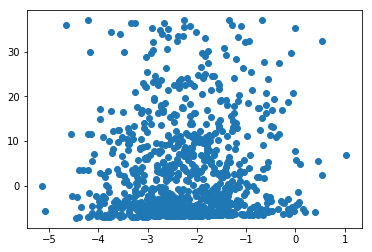

In [290]:
plt.scatter(df_train_copy['x2'], df_train_copy['error'])